# Group Project Report

### Introduction

In school, the way used to measure a student’s knowledge is often through exams. To do well on exams, students often resort to spending as much time as possible to study in preparation for them. We want to investigate whether study time and exam results have an impact on a person’s knowledge level of that subject.

**The question we are trying to answer is: based on the time they spend studying and exam performance, what knowledge level would the user have on a subject?**

We are using the [User Knowledge Modeling](https://archive.ics.uci.edu/dataset/257/user+knowledge+modeling) dataset from the UCI Machine Learning Repository, donated by Kahraman, Colak, and Sagiroglu in 2013. There 403 observations which have been already split – 258 in the training dataset, and 145 in the testing set. The set contains no missing values. The dataset contains the following columns, in the order of left to right:

- user’s degree of study time for the goal subject materials (STG)
- user's the degree of repetition for studying the goal subject materials (SCG)
- user’s degree of study time for related subjects (STR)
- user's exam performance for related subjects (LPR)
- user's exam performance for the goal subject (PEG)
- user's knowledge level (UNS)-- classified as very low, low, middle, or high. 

Aside from UNS which indicates the knowledge level of users, the other columns are all dbl variables.

### Expected Outcomes and Significance

The findings should not only allow us to predict a user's knowledge level based on the different variables, but also show whether spending a lot of time studying and performing well in exams is correlated to having a high knowledge level in a subject. The results of the findings could have several impacts: for example, a student's perspective on test-taking and studying may be shifted if the findings show that studying a lot and high performance in exams does not have a strong correlation with high knowledge level. Additionally, an educator may consider reforming their curriculum if a student's performance on tests is not indicative of them actually gaining a high level of knowledge for the material. Some future questions the findings could hypothetically lead to, depending on the outcomes of this project, are:

- Are there methods of evaluating a student's learning that are better than exams, in terms of helping students gain high knowledge levels of subjects?
- If study time does not necessarily correlate with having a high knowledge level, which study methods (i.e. repetition) could be used to help students retain a high knowledge level?
- If a student has a high knowledge level of one subject, will it be easier for them to gain a high knowledge level of a related subject?

### Preliminary Exploratory Data Analysis

In [7]:
library(tidyverse) #loading packages
library(repr)
library(rvest)
library(stringr)
library(readxl)
library(dplyr)
library(yardstick)

library(tidymodels)

install.packages("ISLR")
install.packages("GGally")
install.packages("kknn")

library(kknn)
library(ISLR)
library(GGally)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Reading and Tidying Data

In [10]:
# reading data from url into jupyter

training_data <- read_csv("https://raw.githubusercontent.com/thisisyifulin/group_project-group34-/main/Training_Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv") |>
select(STG, SCG, STR, LPR, PEG, UNS)

testing_data <- read_csv("https://raw.githubusercontent.com/thisisyifulin/group_project-group34-/main/Test_Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv")



New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 145 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
head(training_data)
tail(training_data)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.54,0.51,0.55,0.64,0.19,Low
0.61,0.78,0.69,0.92,0.58,High
0.78,0.61,0.71,0.19,0.60,Middle
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


> <b> Figure 1: </b>
>
>The training data loaded from the web and present the first and final rows.

In [12]:
head(testing_data)
tail(testing_data)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.68,0.61,0.34,0.31,0.23,Low
0.90,0.78,0.62,0.32,0.89,High
0.85,0.82,0.66,0.83,0.83,High
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


> <b> Figure 2: </b>
>
>The testing data loaded from the web and present the first and final rows.

In [13]:
# data is already tidy

### Summarizing the Data

Now, the data is already read. Our next step is to count and find the mean of each varibles for different category level of UNS. 

In [14]:
#summarize

#summarize

counts_class <- training_data |>
                group_by(UNS) |>
                summarize(count_class = n())

mean_estimates<-training_data|>
group_by(UNS)|>
summarize(mean_STG=mean(STG),
          mean_TEG=mean(PEG),
          mean_SCG=mean(STG),
          mean_STR=mean(PEG),
            mean_LPR=mean(LPR))|>
select(-UNS)

summary<-counts_class|>
mutate(count=count_class)|>
select(-count_class)|>
cbind(mean_estimates)

summary

UNS,count,mean_STG,mean_TEG,mean_SCG,mean_STR,mean_LPR
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,63,0.4216508,0.77253968,0.4216508,0.77253968,0.5012698
Low,83,0.3211446,0.23762651,0.3211446,0.23762651,0.4973494
Middle,88,0.3999773,0.54238636,0.3999773,0.54238636,0.3428409
very_low,24,0.3057917,0.09083333,0.3057917,0.09083333,0.3587500


> <b> Figure 3: </b>
>
> The mean and count for each varibles (STG, PEG, SCG, STR and LPR) and UNS level.
?
> STG: user’s degree of study time for the goal subject materials
>
> PEG: user's exam performance for the goal subject
>
> SCG: user's the degree of repetition for studying the goal subject materials 
>
> STR: user’s degree of study time for related subjects
>
> LPR: user's exam performance for related subjects


According to the group_by and summarize function, we can see that for different UNS level, the mean of STG, TEG, SCG, STR and LPR are different. These means all these varibles are helpful to help us in predicting a new observation. But it is not realistic to use all varibles as the predictors, so we still need further operation to choose the decide the most useful variables.

In [15]:
#finds the mean of predictors

select_training_data <- training_data |>
select(STG, STR, LPR, PEG, UNS) # selecting the variables


#count the number of cells with na and renamed it into column count_ca
data_count_na <- summarize(select_training_data, count_na = sum(is.na(select_training_data)))

data_count_na
#since there are no n/a, there are no rows with n/a

count_na
<int>
0


><b> Figure 4: </b>
>
>The count of rows with missing values

### Exploratory Data Analysis -- Visualizations

In order to use knn classification, we need to figure out the relationship between different variables. So we using ggplot and ggpairs to measure the strength the relationship between different predictor variables and determine which two variables have the most strong relationship.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


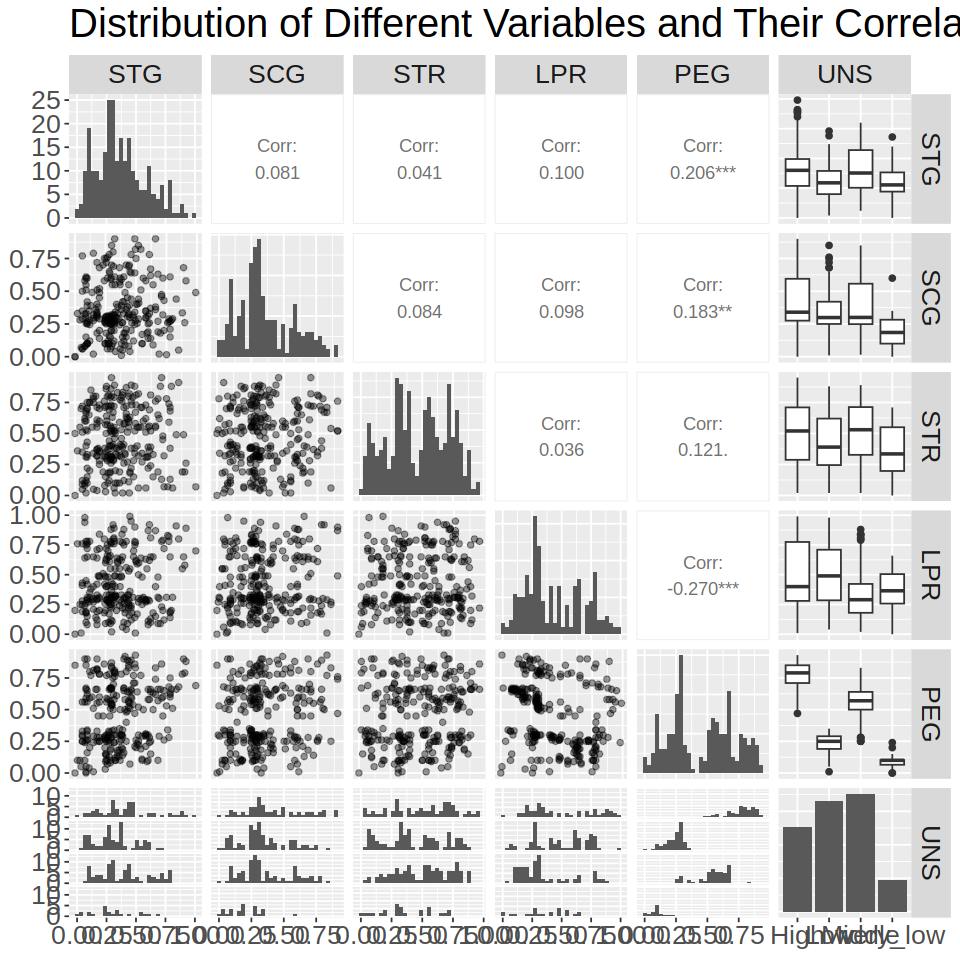

In [32]:
set.seed (1234)
options(repr.plot.width = 8, repr.plot.height = 8)

pairplot <- training_data |> 
     ggpairs(
         lower = list(continuous = wrap('points', alpha = 0.4)),
         diag = list(continuous = "barDiag")
     ) +
     theme(text = element_text(size = 20)) +
ggtitle("Distribution of Different Variables and Their Correlations")

pairplot

><b> Figure 5: </b>
>
>Pairplot comparing the distributions of the variables

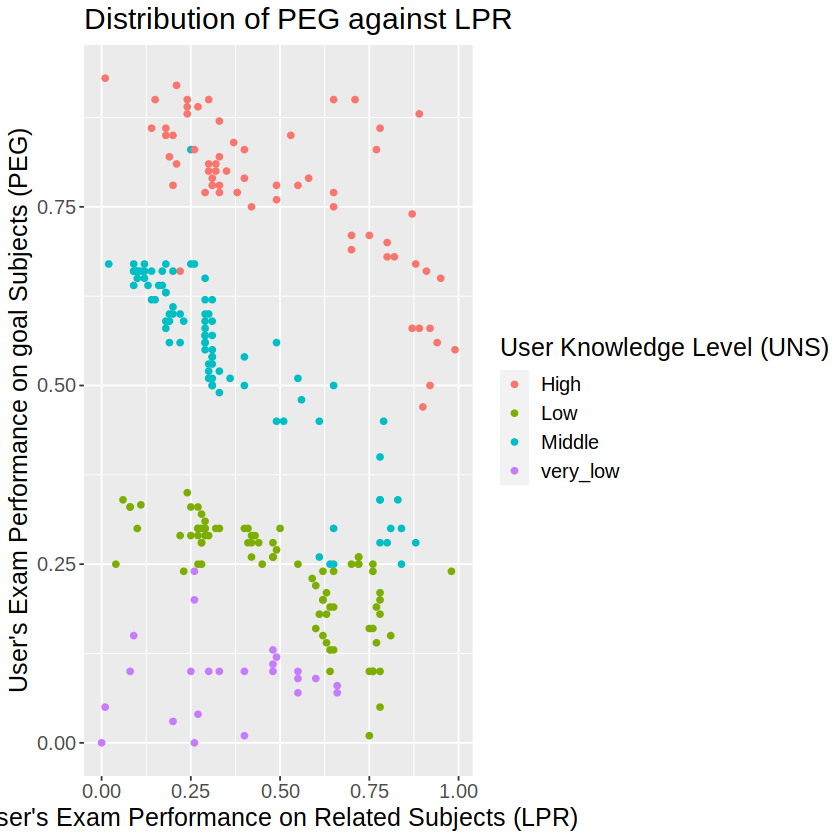

In [17]:
lpr_peg_plot <- ggplot(training_data, aes(x = LPR, y = PEG)) +
geom_point(aes(color = UNS)) +
labs(x = "User's Exam Performance on Related Subjects (LPR)",
     y = "User's Exam Performance on goal Subjects (PEG)",
     color = "User Knowledge Level (UNS)") +
theme(text = element_text(size = 15)) +
ggtitle("Distribution of PEG against LPR")
lpr_peg_plot

><b> Figure 6: </b>
>
>Visualization of the correlation between the two selected variables. We can see that a lower PEG seems to have a correlation with a lower UNS. However, it is not as clear what the correlation between LPR and UNS is.

### Data Analysis -- K-nearest neighbor classification

In order to creat a knn classification model to predict a new observation, we need to is to find out the most 
accurate k value to use. The first step in choosing the parameter K is to generate five different validation sets.
Then, creating a specification model and build a recipe that involve UNS as class, LPR and PEG as predictors.
Finally, we create a workflow and use the tune_grid function to fit the model for each value in a range of parameter values.


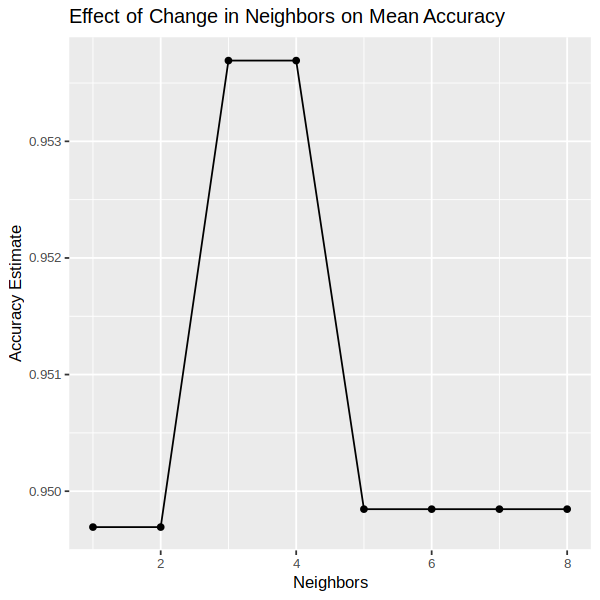

In [23]:
set.seed (1234)

options(repr.plot.height = 5, repr.plot.width = 5)

### BEGIN SOLUTION
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

mnist_recipe <- recipe(UNS ~ PEG + LPR, data = training_data)

mnist_vfold <- vfold_cv(training_data, v = 5, strata = UNS)

knn_results <- workflow() |>
                 add_recipe(mnist_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = mnist_vfold, grid = tibble(neighbors = c(1,2,3,4,5,6,7,8))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 10)) +
ggtitle("Effect of Change in Neighbors on Mean Accuracy")

cross_val_plot

><b> Figure 7: </b>
>
>Graph of Accuracy against Neighbors

We see that we get highest accuracy with 3 and 4 neighbors, but since we have 4 classes, we will choose 3 so there is no tie between the classes. We now put k = 3 directly into the specification instead of using tune() function and create a workflow to combine the new specification and recipe. Finally, we fit the training data.

In [20]:

new_training_data<-training_data|>
select(UNS, LPR, PEG) |>
mutate(LPR=as.numeric(LPR))|>
mutate(PEG=as.numeric(PEG)) |>
mutate(UNS = as.factor(str_replace(training_data$UNS, "Very Low", "very_low"))) 

new_testing_data<-testing_data|>
select(UNS, LPR, PEG)|>
mutate(LPR=as.numeric(LPR))|>
mutate(PEG=as.numeric(PEG)) |>
mutate(UNS = as.factor(str_replace(testing_data$UNS, "Very Low", "very_low")))

In [25]:
set.seed (1234)

pred1 <- tibble(LPR= 0.87, PEG=0.55)

recipe<-recipe(UNS~PEG+LPR, data=new_training_data)|>
 step_scale(all_predictors())|>
    step_center(all_predictors())

knn_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
       set_engine("kknn") |>
       set_mode("classification")


fit<- workflow() |>
          add_recipe(recipe) |>
          add_model(knn_spec) |>
          fit(data = new_training_data)

predicted1<-predict(fit, pred1)
predicted1

.pred_class
<fct>
High




><b> Figure 8: </b>
>
>Predict a new observation's UNS level, checking to see if the program is functional.

In [26]:
set.seed (1234)
test_predictions <- predict(fit, new_testing_data) |>
  bind_cols(new_testing_data)


classification_metrics <- test_predictions |>
metrics(truth = UNS, estimate=.pred_class)|>
filter(.metric == "accuracy")


classification_metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9517241


><b> Figure 9: </b>
>
>The accuracy of the k-nearest neighbor classification model

In [16]:
set.seed (1234)

conf_mat <- test_predictions |> 
      conf_mat(truth = UNS, estimate = .pred_class)

conf_mat

          Truth
Prediction High Low Middle very_low
  High       39   0      0        0
  Low         0  42      1        2
  Middle      0   3     33        0
  very_low    0   1      0       24

><b> Figure 10: </b>
>
>The distribution of errors

We assign the testing data into the classification model and compare the predictions and the actual UNS level of 
the observations in the testing dataset to get the accuracy of our model. We can combine the predictions with 
our actual dataset together and use metrics to calculate the accuracy.

We can see the accuracy is around 95%, which makes this a successful model. However, we are still curious what role does the predictor LPR play in this model as it does not show its importance in the scatter plot. We will run the accuracy test again but this time with just predictor PEG.

In [27]:
recipe_PEG<-recipe(UNS~PEG, data=new_training_data)|>
 step_scale(all_predictors())|>
    step_center(all_predictors())



fit_PEG<- workflow() |>
          add_recipe(recipe_PEG) |>
          add_model(knn_spec) |>
          fit(data = new_training_data)

test_predictions_PEG <- predict(fit_PEG, new_testing_data) |>
  bind_cols(new_testing_data)


classification_metrics_PEG <- test_predictions_PEG |>
metrics(truth = UNS, estimate=.pred_class)|>
filter(.metric == "accuracy")


classification_metrics_PEG


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8068966


><b> Figure 11: </b>
>
>Accuracy metric with PEG as the only predictor.

As we removed the predictor LPR, the accuracy of the model dropped, indicating that LPR still plays an important role in this model.

### Methods
In the analysis section, we begin by summarizing key characteristics of the dataset, focusing on mean exam perforamce, study time, and observations with missing values. Using ggpair and ggplot, we identify LPR and PEG as crucial predictors, with UNS as the target class for our knn classification.

We proceed with cross-validation, tuning the classifier and perform an linear model to find an optimal k-value for our knn model. Both k=3 and k=4 has the same accuracy, and we chose k=3 to prevent a tie for our 4 classifier. The final model, built with k=3, achieves a 95% accuracy on the testing dataset. Moving forward, we summarize the distribution of false positives and false negatives, finding potential areas of improvement.

A crucial aspect of our analysis involves understanding the individual contributions of PEG and LPR in our prediction model. With performing the model with a single predictor, we can conclude that PEG plays a dominant role in predictions, while LPR consistently supports the model's outcomes.



### Discussions

Using the k-nearest neighbors (KNN) model, we achieved an impressive 95% accuracy in predicting a user's knowledge level based on the exam performance predictors PEG (exam performance on the goal subject) and LPR (exam performance on related subjects). In our model, predictor PEG seems to be playing a crucial role in predicting knowledge levels, as we achieve 80% accuracy in predicting user knowledge levels when using it as the only predictor. LPR, on the other hand, plays a minor role in influencing predictions. It is surprising to note that there is no significant correlation between study time and exam performance, posing an unresolved question for our model. This observation aligns with Morrison's perspective (2016), suggesting that study outcomes may not always correlate with the time invested; rather, the effectiveness of study methods plays a more crucial role. Further investigation into the dynamics between study habits and academic outcomes will be needed to fully answer the question. 


Despite the uncertainty regarding the relationship between study time and exam performance, our model aligns with our initial hypothesis: individuals with high exam performance tend to have a higher knowledge level. 


The goal of this model is to help students and educators better understand how to approach learning and assessments, and we hope that our research findings have the potential to reshape perspectives and drive educational changes, leading to potential improvements in learning and assessment methods. We believe that these outcomes can contribute to a positive impact on the educational landscape, fostering continuous improvement and adaptation to evolving needs and challenges.



### References

Kahraman,Hamdi, Colak,Ilhami, and Sagiroglu,Seref. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.

Morrison, N. (2016). The Secret of Effective Learning May Be Less Study, Not More. Forbes. https://www.forbes.com/sites/nickmorrison/2016/05/30/the-secret-of-effective-learning-may-be-less-study-not-more/?sh=759e31818c7e